<a href="https://colab.research.google.com/github/yayonecathy/powellbookstore/blob/main/Powell_eBook_Subscription(Classification)_Prediction_0131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Code snippet 0
#installing pycaret
!pip install -U --pre pycaret


In [ ]:
#code snippet 1
#import dataset
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1XSBE7VwTJ-xB300r2JAwZesaAbGTLvMgS4qRxXfDjys/pub?gid=0&single=true&output=csv')
df

,Customer ID,Title,First Name,Middle Name,Last Name,Suffix,Street Address1,Street Address2,City-ZipCode-State,Birth Date,...,Occupation,Gender,Marital Status,Home Owner Status,Number of Cars Owned,Number of Children At Home,Total Number of Children,Annual Income,Avg Monthly Spend,eBook Subscriber Flag
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Cleveland-44101-Ohio,4/8/66,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seattle-98101-Washington,5/14/65,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Omaha-68101-Nebraska,8/12/65,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,Fort Worth-76101-Texas,2/15/68,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Oakland-94601-California,8/8/68,...,Professional,F,S,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,San Antonio-78201-Texas,3/22/65,...,Professional,F,M,1,4,5,5,101542,101,0
16515,26100,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Pittsburgh-15201-Pennsylvania,4/2/36,...,Professional,F,S,1,2,0,3,46549,46,0
16516,11328,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Honolulu-96801-Hawaii,1/1/40,...,Management,M,M,1,2,0,5,133053,79,0
16517,23077,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Anaheim-92801-California,10/20/46,...,Skilled Manual,M,M,1,2,0,4,31930,65,0


<Axes: >

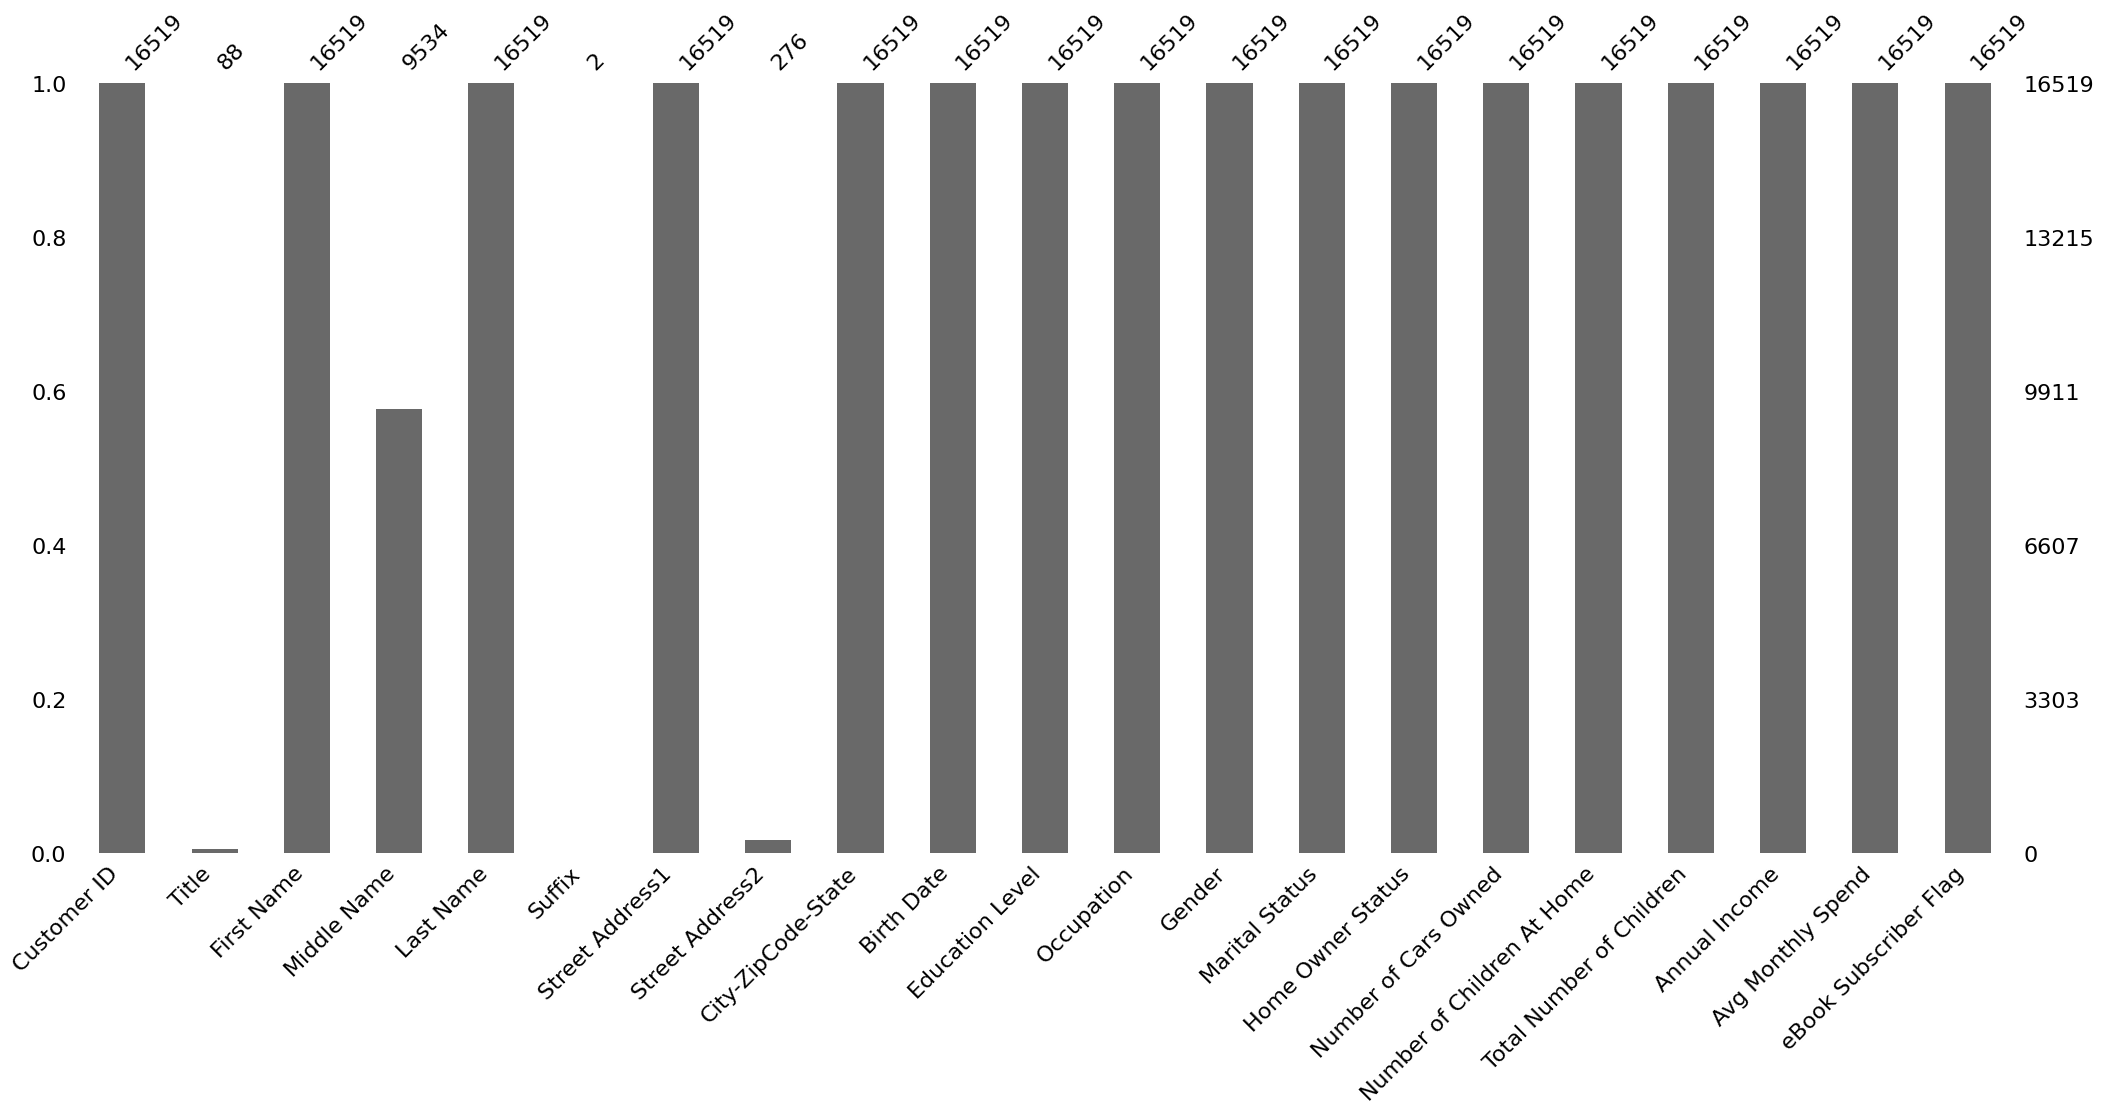

In [ ]:
import missingno as msno
msno.bar(df
        )

In [ ]:
#code snippet 2
#displaying the columnds
df.columns

Index(['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name',
       'Suffix', 'Street Address1', 'Street Address2', 'City-ZipCode-State',
       'Birth Date', 'Education Level', 'Occupation', 'Gender',
       'Marital Status', 'Home Owner Status', 'Number of Cars Owned',
       'Number of Children At Home', 'Total Number of Children',
       'Annual Income', 'Avg Monthly Spend', 'eBook Subscriber Flag'],
      dtype='object')

In [ ]:
#code snippet 2-1
from datetime import datetime


# Current date (as specified in your prompt)
current_date = datetime(2025, 1, 30)

def calculate_age(birth_date):
    # Convert birth_date string to datetime object
    birth_date = datetime.strptime(birth_date, '%m/%d/%y')

    # If the year is greater than current year, assume it's from the previous century
    if birth_date.year > current_date.year:
        birth_date = birth_date.replace(year=birth_date.year - 100)

    # Calculate age
    age = current_date.year - birth_date.year

    # Adjust age if birthday hasn't occurred this year
    if (current_date.month, current_date.day) < (birth_date.month, birth_date.day):
        age -= 1

    return age

# Apply the function to create a new 'Age' column
df['Age'] = df['Birth Date'].apply(calculate_age)

# Display the result
print(df[['Birth Date', 'Age']])

      Birth Date  Age
0         4/8/66   58
1        5/14/65   59
2        8/12/65   59
3        2/15/68   56
4         8/8/68   56
...          ...  ...
16514    3/22/65   59
16515     4/2/36   88
16516     1/1/40   85
16517   10/20/46   78
16518     4/7/45   79

[16519 rows x 2 columns]


In [ ]:
#code snippet 2-2

# Function to split the combined column
def split_location(location):
    parts = location.split('-')
    return pd.Series(parts)

# Apply the function to create new columns
df[['City', 'ZipCode', 'State']] = df['City-ZipCode-State'].apply(split_location)

# Display the result
print(df[['City-ZipCode-State', 'City', 'ZipCode', 'State']])

                  City-ZipCode-State         City ZipCode         State
0               Cleveland-44101-Ohio    Cleveland   44101          Ohio
1           Seattle-98101-Washington      Seattle   98101    Washington
2               Omaha-68101-Nebraska        Omaha   68101      Nebraska
3             Fort Worth-76101-Texas   Fort Worth   76101         Texas
4           Oakland-94601-California      Oakland   94601    California
...                              ...          ...     ...           ...
16514        San Antonio-78201-Texas  San Antonio   78201         Texas
16515  Pittsburgh-15201-Pennsylvania   Pittsburgh   15201  Pennsylvania
16516          Honolulu-96801-Hawaii     Honolulu   96801        Hawaii
16517       Anaheim-92801-California      Anaheim   92801    California
16518       Fort Wayne-46801-Indiana   Fort Wayne   46801       Indiana

[16519 rows x 4 columns]


In [ ]:
#code snippet 3
#setting the target variable
target = 'eBook Subscriber Flag'

In [ ]:
#code snippet 4
#setting the noise/redundant variables
ignored_columns= ['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name',
       'Suffix', 'Street Address1', 'Street Address2', 'City-ZipCode-State',
       'Birth Date',  'Avg Monthly Spend' ]

In [ ]:
#code snippet 5
#setting the numerical variables
numeric_columns = ['Age', 'Number of Cars Owned',
       'Number of Children At Home', 'Total Number of Children',
       'Annual Income']

In [ ]:
#code snippet 6
#setting the categorical variables
categorical_columns = ['Education Level', 'Occupation', 'Gender',
       'Marital Status', 'Home Owner Status']

In [ ]:
#code snippet 7
#importing classification libraries
from pycaret.classification import *

In [ ]:
#code snippet 8
#setting /configuring pycaret model
classificaiton_setup = setup(data = df, target = target,
                              ignore_features = ignored_columns,
                              numeric_features = numeric_columns,
                             categorical_features = categorical_columns)

,Description,Value
0,Session id,8657
1,Target,eBook Subscriber Flag
2,Target type,Binary
3,Original data shape,"(16519, 25)"
4,Transformed data shape,"(16519, 22)"
5,Transformed train set shape,"(11563, 22)"
6,Transformed test set shape,"(4956, 22)"
7,Ignore features,11
8,Numeric features,5
9,Categorical features,5


In [ ]:
#code snippet 9
#invoking ML alo
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7811,0.8478,0.5908,0.7032,0.6420,0.4861,0.4900,3.5000
dummy,Dummy Classifier,0.6677,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8657, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#code snippet 10
#creating the model with best algo(accurac plus best precision)
best_model = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7640,0.8296,0.5547,0.6762,0.6094,0.4428,0.4472
1,0.7666,0.8417,0.5688,0.6780,0.6186,0.4524,0.4560
2,0.7891,0.8473,0.5922,0.7238,0.6514,0.5024,0.5076
3,0.7846,0.8591,0.6172,0.6991,0.6556,0.4998,0.5018
4,0.7967,0.8516,0.6120,0.7321,0.6667,0.5221,0.5264
5,0.7803,0.8526,0.5938,0.6994,0.6423,0.4852,0.4886
6,0.7941,0.8651,0.6146,0.7239,0.6648,0.5177,0.5213
7,0.7708,0.8409,0.5938,0.6766,0.6325,0.4669,0.4690
8,0.7993,0.8642,0.6042,0.7436,0.6667,0.5253,0.5311


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

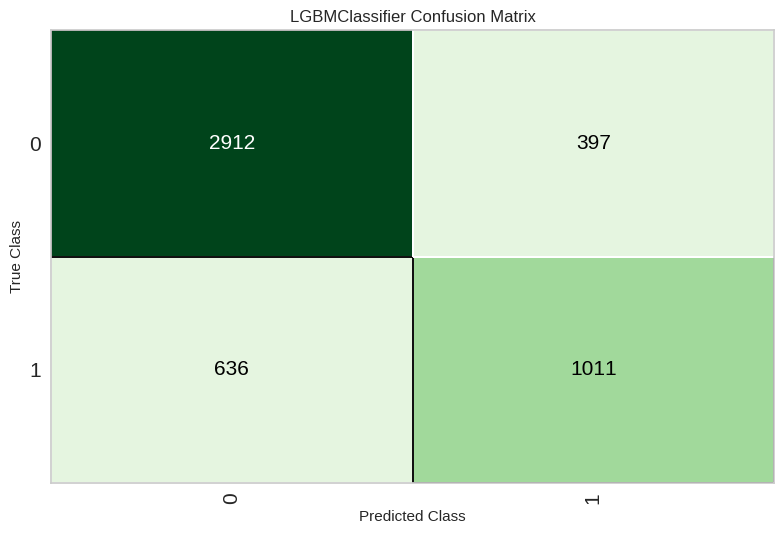

In [ ]:
#code snippet 11
#displaying confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
#code snippet 12
# predicting the readmit status
subsription_predictions= predict_model(best_model,df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8486,0.9189,0.6965,0.8207,0.7535,0.6453,0.6498


In [ ]:
subsription_predictions.to_csv("Powell subscription predictions.csv")

In [ ]:
#code snippet 13
#importing client data
client_data = pd.read_csv('https://docs.google.com/spreadsheets/d/16s5TlD28DsgScenFfe7cMrzdCl75LQZA3mbOM_EekxA/pub?gid=1509803897&single=true&output=csv')
client_data

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,StreetAddress1,StreetAddress2,City-ZipCode-State,BirthDate,EducationLevel,Occupation,Gender,MaritalStatus,HomeOwnerStatus,NumCarsOwned,NumChildrenAtHome,TotalNumChildren,AnnualIncome
0,Customer_xx_1289,NaN,Trevor,NaN,Jenkins,NaN,4697 Yosemite Dr.,NaN,Seattle-98101-Washington,2/27/1953,Graduate Degree,Management,M,S,1,2,0,3,101674
1,Customer_xx_1290,NaN,Zachary,NaN,Anderson,NaN,2476 Mt. Whitney Way,NaN,Oklahoma City-73101-Oklahoma,5/14/1939,Bachelors,Management,M,M,1,2,0,5,131143
2,Customer_xx_1291,NaN,Frank,F,Navarro,NaN,Buergermeister-ulrich-str 2987,NaN,Tampa-33601-Florida,8/10/1961,Graduate Degree,Clerical,M,M,1,0,0,1,58637
3,Customer_xx_1292,NaN,Dennis,M,She,NaN,"828, rue de Berri",NaN,Charlotte-28201-North Carolina,7/8/1961,Graduate Degree,Clerical,M,S,1,0,0,1,45259
4,Customer_xx_1293,NaN,Randy,A,Zeng,NaN,2334 Brandywine Way,NaN,Plano-75023-Texas,8/21/1936,Graduate Degree,Clerical,M,M,1,0,0,1,46868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,Customer_xx_3892,NaN,Cynthia,NaN,Kapoor,NaN,7045 Creekside Drive,NaN,Denver-80201-Colorado,7/28/1978,Partial College,Manual,F,S,0,1,0,0,20689
2604,Customer_xx_3893,NaN,Lance,NaN,Jimenez,NaN,Auf Der Steige 532,NaN,Miami-33101-Florida,11/26/1943,Bachelors,Clerical,M,M,1,0,0,1,59132
2605,Customer_xx_3894,NaN,Dominique,M,Saunders,NaN,3792 Westwood Ct.,NaN,Fresno-93701-California,4/26/1961,Graduate Degree,Clerical,F,M,0,0,0,3,65669
2606,Customer_xx_3895,NaN,Clayton,NaN,Zhang,NaN,"1080, quai de Grenelle",NaN,Corpus Christi-78401-Texas,3/5/1959,Bachelors,Clerical,M,M,1,0,0,3,59736


In [ ]:
client_data.rename(columns={' StreetAddress1 ': 'Street Address1',' EducationLevel ': 'Education Level',' Occupation ': 'Occupation',
' Gender ': 'Gender',' MaritalStatus ': 'Marital Status',' HomeOwnerStatus ': 'Home Owner Status',' NumCarsOwned ': 'Number of Cars Owned',
' NumChildrenAtHome ': 'Number of Children At Home',' TotalNumChildren ': 'Total Number of Children',' AnnualIncome ': 'Annual Income'}, inplace=True)
client_data.columns

Index([' CustomerID ', ' Title ', ' FirstName ', ' MiddleName ', ' LastName ',
       ' Suffix ', 'Street Address1', ' StreetAddress2 ',
       'City-ZipCode-State ', ' BirthDate ', 'Education Level', 'Occupation',
       'Gender', 'Marital Status', 'Home Owner Status', 'Number of Cars Owned',
       'Number of Children At Home', 'Total Number of Children',
       'Annual Income'],
      dtype='object')

In [ ]:
# prompt: use client_data as the dataset and ' BirthDate ' as the column- write a code to calculate the actual age of a person based on the info given as MM/DD/YYYY

# Current date (as specified in your prompt)
current_date = datetime(2025, 1, 30)

def calculate_age(birth_date):
    # Handle missing or invalid birth dates
    if pd.isna(birth_date) or not isinstance(birth_date, str) or len(birth_date) < 8 :
        return None  # or some other default value

    try:
        # Convert birth_date string to datetime object
        birth_date = datetime.strptime(birth_date, '%m/%d/%Y')

        # Calculate age
        age = current_date.year - birth_date.year

        # Adjust age if birthday hasn't occurred this year
        if (current_date.month, current_date.day) < (birth_date.month, birth_date.day):
            age -= 1
        return age
    except ValueError:
        return None # or some other default value

# Apply the function to create a new 'Age' column
client_data['Age'] = client_data[' BirthDate '].apply(calculate_age)

# Display the result
print(client_data[[' BirthDate ', 'Age']])

      BirthDate   Age
0      2/27/1953   71
1      5/14/1939   85
2      8/10/1961   63
3       7/8/1961   63
4      8/21/1936   88
...          ...  ...
2603   7/28/1978   46
2604  11/26/1943   81
2605   4/26/1961   63
2606    3/5/1959   65
2607  10/20/1946   78

[2608 rows x 2 columns]


In [ ]:
# prompt: use client_data as the dataset and 'City-ZipCode-State ' as the column- write a code to separate the three data from 'City-Zipcode-State' to 'City', 'ZipCode', 'State'

# Function to split the combined column
def split_location(location):
    if pd.isna(location) or not isinstance(location, str):
        return pd.Series([None, None, None])  # Return None for all parts if location is invalid
    parts = location.split('-')
    if len(parts) == 3:
        return pd.Series(parts)
    else:
        return pd.Series([None, None, None]) # Return None for all parts if split doesn't result in 3 parts


# Apply the function to create new columns
client_data[['City', 'ZipCode', 'State']] = client_data['City-ZipCode-State '].apply(split_location)

# Display the result
print(client_data[['City-ZipCode-State ', 'City', 'ZipCode', 'State']])

                 City-ZipCode-State             City ZipCode           State
0           Seattle-98101-Washington         Seattle   98101      Washington
1       Oklahoma City-73101-Oklahoma   Oklahoma City   73101        Oklahoma
2                Tampa-33601-Florida           Tampa   33601         Florida
3     Charlotte-28201-North Carolina       Charlotte   28201  North Carolina
4                  Plano-75023-Texas           Plano   75023           Texas
...                              ...             ...     ...             ...
2603           Denver-80201-Colorado          Denver   80201        Colorado
2604             Miami-33101-Florida           Miami   33101         Florida
2605         Fresno-93701-California          Fresno   93701      California
2606      Corpus Christi-78401-Texas  Corpus Christi   78401           Texas
2607        Anaheim-92801-California         Anaheim   92801      California

[2608 rows x 4 columns]


In [ ]:
#code snippet 23
# Predicting the monthly spend using the best model
client_data_subscription_predictions = predict_model(best_model, client_data)


In [ ]:
# Exporting to a CSV file
client_data_subscription_predictions.to_csv("Client Data Subscription Predictions.csv")